# Spectral Clustering

Spectral Clustering is a powerful technique for clustering data that is not linearly separable. Unlike traditional clustering methods like K-Means, Spectral Clustering uses the eigenvalues of a similarity matrix to perform dimensionality reduction before clustering in the lower-dimensional space. This makes it particularly useful for complex datasets with non-linear structures.

---

## Key Concepts

### 1. **Affinity Matrix**
   - The affinity matrix (or similarity matrix) defines how similar each pair of data points is. Common methods to compute similarity include:
     - **RBF Kernel**: `exp(-gamma * ||x - y||^2)`
     - **Nearest Neighbors**: Points are similar if they are within a certain distance or are neighbors.

### 2. **Graph Laplacian**
   - The graph Laplacian is derived from the affinity matrix and is used to capture the structure of the data. It helps in transforming the data into a lower-dimensional space where clustering is easier.

### 3. **Eigenvalue Decomposition**
   - Spectral Clustering uses the eigenvalues and eigenvectors of the graph Laplacian to perform dimensionality reduction. The eigenvectors corresponding to the smallest eigenvalues are used to represent the data in a lower-dimensional space.

### 4. **Clustering in Lower-Dimensional Space**
   - After dimensionality reduction, traditional clustering algorithms like K-Means are applied to the transformed data to assign clusters.

---

## Applications of Spectral Clustering
- **Image Segmentation**: Grouping pixels with similar properties.
- **Social Network Analysis**: Identifying communities in networks.
- **Bioinformatics**: Clustering gene expression data.
- **Anomaly Detection**: Identifying outliers in complex datasets.

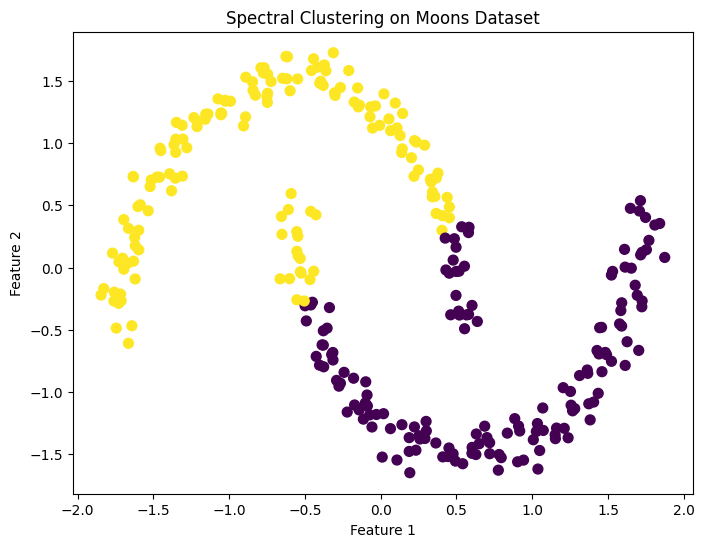

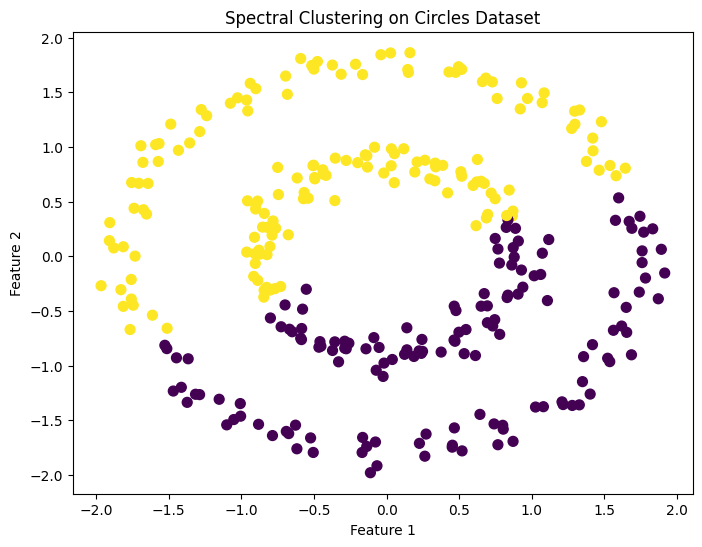

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# Generate synthetic datasets
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
X_circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_moons = scaler.fit_transform(X_moons)
X_circles = scaler.fit_transform(X_circles)

# Apply Spectral Clustering
spectral_moons = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, random_state=42)
spectral_circles = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0, random_state=42)

labels_moons = spectral_moons.fit_predict(X_moons)
labels_circles = spectral_circles.fit_predict(X_circles)

# Visualize the results
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_clusters(X_moons, labels_moons, "Spectral Clustering on Moons Dataset")
plot_clusters(X_circles, labels_circles, "Spectral Clustering on Circles Dataset")

Spectral Clustering has several key parameters that can significantly affect the results:

### 1. **`n_clusters`**
   - The number of clusters to find. This must be specified in advance.
   - **Effect**: Choosing the wrong number of clusters can lead to over-segmentation or under-segmentation.

### 2. **`affinity`**
   - The method used to construct the affinity matrix. Common options are:
     - `rbf`: Radial Basis Function (Gaussian) kernel.
     - `nearest_neighbors`: Constructs the affinity matrix based on nearest neighbors.
   - **Effect**: The choice of affinity affects how similarity is measured between points.

### 3. **`gamma`**
   - The kernel coefficient for the `rbf` affinity. It controls the influence of each point on its neighbors.
   - **Effect**: A small gamma makes the kernel behave like a linear model, while a large gamma makes it focus on local neighborhoods.

### 4. **`eigen_solver`**
   - The method used for eigenvalue decomposition. Options include `arpack`, `lobpcg`, and `amg`.
   - **Effect**: Different solvers may have varying performance and accuracy.

Let's see how changing `gamma` and `affinity` affects the clustering results.

c:\Users\Kanavpreet Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Kanavpreet Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Kanavpreet Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


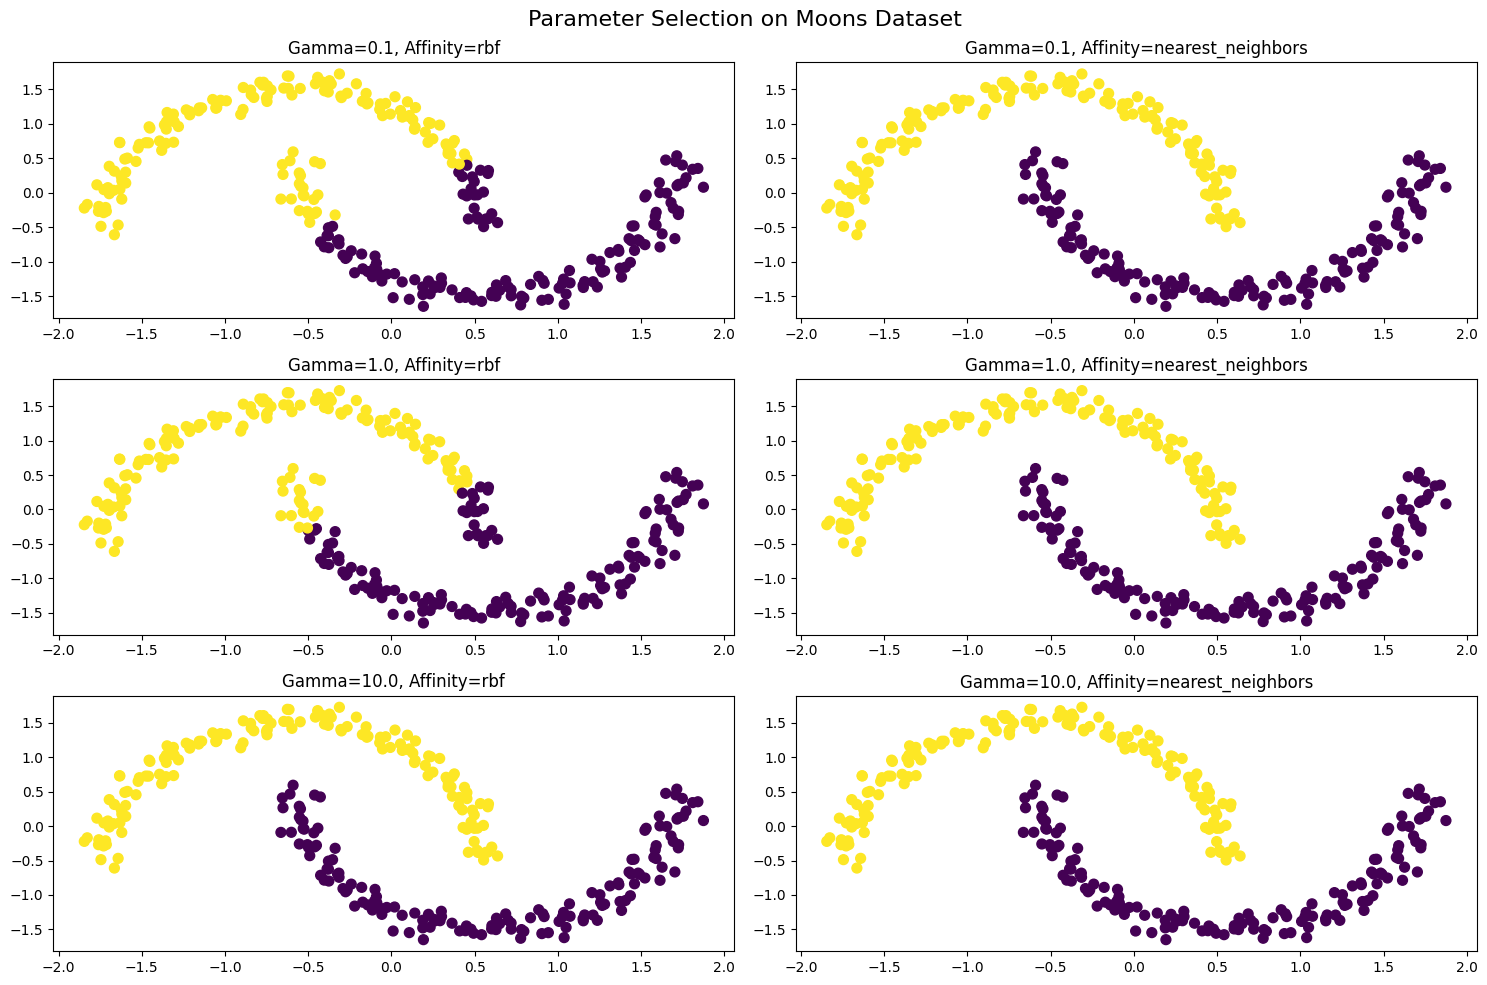

c:\Users\Kanavpreet Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Kanavpreet Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Kanavpreet Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


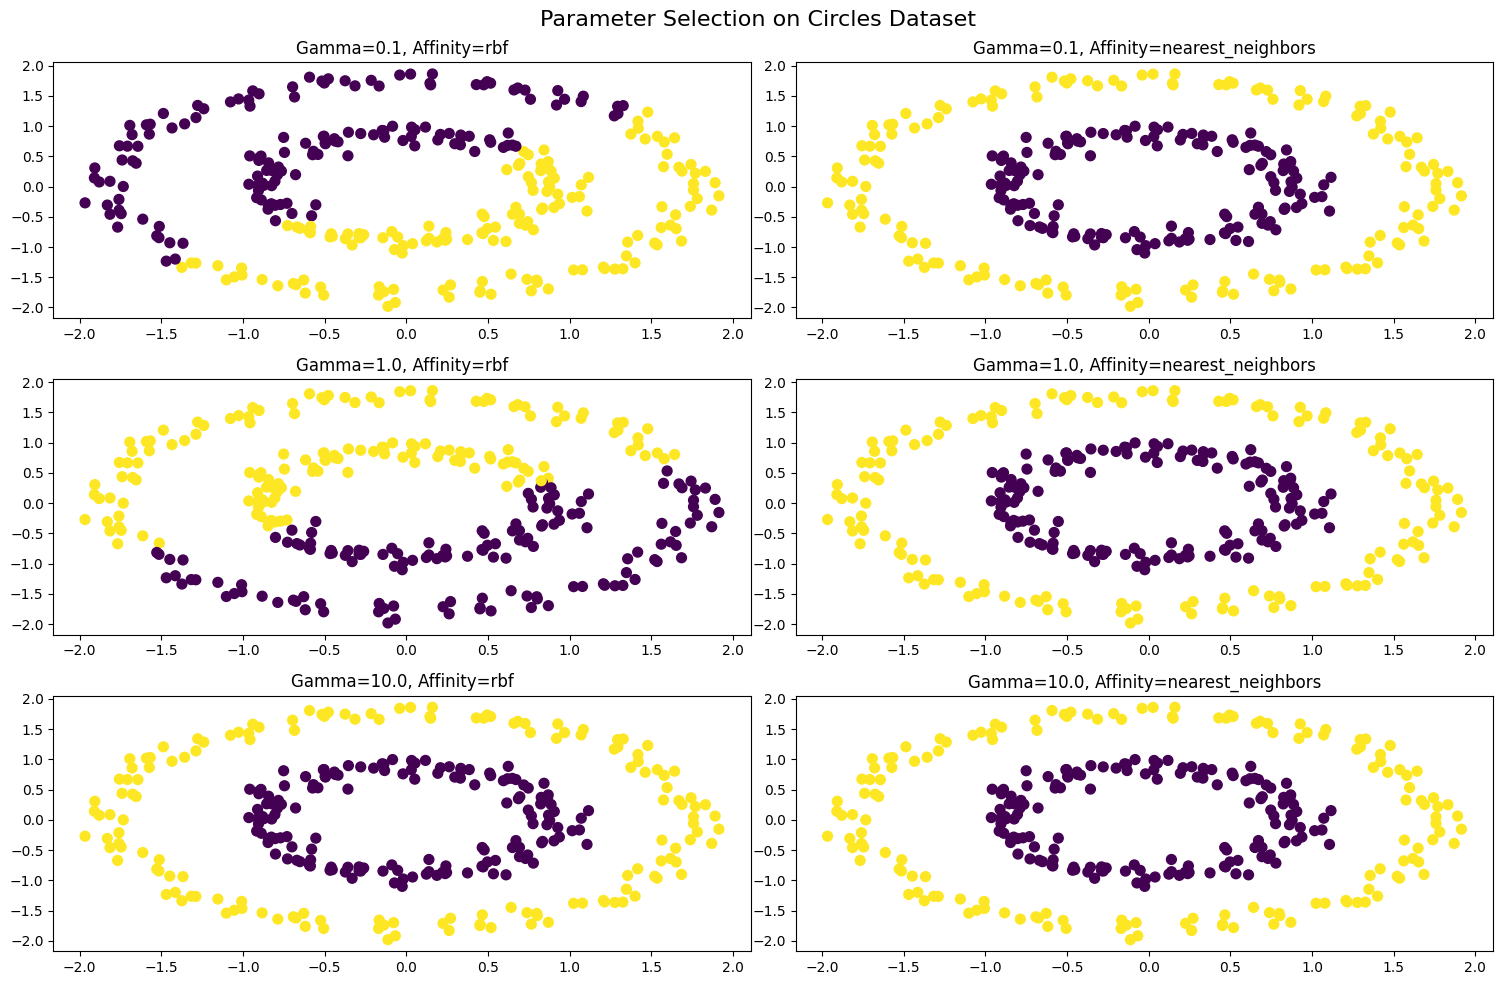

In [6]:
def experiment_parameters(X, dataset_name):
    gammas = [0.1, 1.0, 10.0]
    affinities = ['rbf', 'nearest_neighbors']
    
    plt.figure(figsize=(15, 10))
    for i, gamma in enumerate(gammas):
        for j, affinity in enumerate(affinities):
            spectral = SpectralClustering(n_clusters=2, affinity=affinity, gamma=gamma, random_state=42)
            labels = spectral.fit_predict(X)
            
            plt.subplot(len(gammas), len(affinities), i * len(affinities) + j + 1)
            plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
            plt.title(f"Gamma={gamma}, Affinity={affinity}")
    
    plt.suptitle(f"Parameter Selection on {dataset_name} Dataset", fontsize=16)
    plt.tight_layout()
    plt.show()

# Experiment with parameters on the moons dataset
experiment_parameters(X_moons, "Moons")

# Experiment with parameters on the circles dataset
experiment_parameters(X_circles, "Circles")

Spectral Clustering is a versatile and powerful clustering technique, especially for non-linearly separable data. By understanding its key parameters and their effects, you can apply it effectively to a wide range of problems. Experiment with different datasets and parameters to gain a deeper understanding of its behavior.

---

## Resources
- [Scikit-learn Spectral Clustering Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

- [Wikipedia: Spectral Clustering](https://en.wikipedia.org/wiki/Spectral_clustering)